**Column Details**
- **PassengerId**: Unique identifier for each passenger, formatted as "Group_Number_Passenger".
- **HomePlanet**: The planet from which the passenger departed (e.g., Earth, Europa, Mars).
- **CryoSleep**: Indicates whether the passenger was in suspended animation during the voyage (True/False).
- **Cabin**: Passenger’s cabin number, structured as "Deck/Number/Side".
- **Destination**: The exoplanet destination of the passenger.
- **Age**: The passenger’s age in years.
- **VIP**: Whether the passenger had VIP status (True/False).
- **RoomService**: Amount spent on in-room service.
- **FoodCourt**: Amount spent at the food court.
- **ShoppingMall**: Amount spent in the shopping mall.
- **Spa**: Amount spent on spa services.
- **VRDeck**: Amount spent on the VR deck.
- **Name**: Full name of the passenger.
- **Transported**: Whether the passenger was transported to another dimension (True/False).


In [4]:
# importing all the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the data
df = pd.read_csv(r"/content/spaceship_titanic.csv")
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
df.shape

(8693, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


* We have 7 object columns.
* We also have 7 numerical columns (6f & 1bool)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


Looking at this we can infer:
* We have a quite a few null values.
* Most of the columns are highl deviated meaning we'll have to use scaling methods to scale them.
* Many of the columns appears to be right tailed, let's figure out their distribution in a better way using visualization techniques.

In [11]:
# Detecting null values
df.isnull().sum()

,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


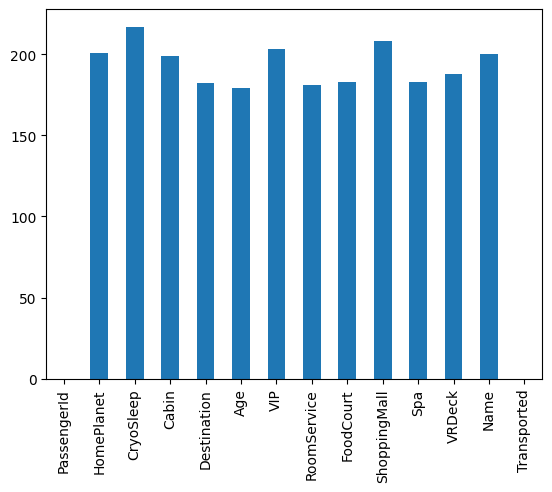

In [10]:
#plotting null values
df.isnull().sum().plot.bar()
plt.show()

* Like we infer earlier we do have a lot of null values in all the columns.
* Now we can either fill the null values using mean for the numerical columns and mode for the categorical columns but that is not a smart way to fill them.
* Rather we can find the relationship between other columns and then figure out a way to fill them smartly instead.